## Формирование набора данных на основа анализа межстимульного интервала (МСИ)

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


В наборе данных: 1-я колонка - моменты времени предъявления стимулов, 2-я колонка - время реакции, с.

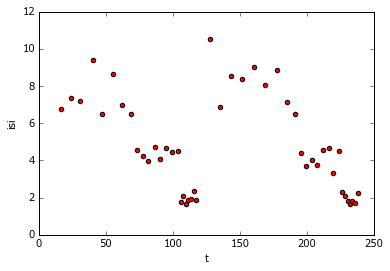

In [2]:
D = pd.read_table('rt.tsv')
D['isi']=D.t.diff()  #разница между соседними моментами времени 

D.plot('t','isi',kind='scatter', color='r');

На основании рассчитанных межстимульных интервалов (МСИ, isi) можно выделить блоки реакций на зрительные стимулы с изменением МСИ от 8 до 2 с и на слуховые стимулы с аналогичной динамикой МСИ.

Так как мы работаем с единым блоком данных, то эти признаки можно добавить в виде дополнительных колонок в эту же таблицу.

Способов задать пороговые значения для выделения групповых признаков может быть много. Желательно использовать более универсальные.

Например, можно ввести условие для отбора слуховых реакций `D.t > 130` , т.е. время стимула более 130 с от начала теста. Однако, в другом тесте продолжительность может измениться, поэтому надежнее использовать разницу в МСИ. Для этого дифференцируем этот ряд значений. Переход МСИ от 2 к 8 с возможен только однажды - при смене модальности в середине теста. В этом месте разница между последовательными значениями МСИ резко возрастает более, чем на 5 с.

In [3]:
D.isi.diff()>5

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
Name: isi, dtype: bool

In [4]:
iA=(D.isi.diff()>5).argmax()  #сохраняем позицию, где условие истинно.
iA

23

Это индекс того места в ряде значений, где начинаются слуховые реакции

In [5]:
# создадим колонку с одним значением v - visual
D['mod']='v'
# значение после найденого индекса заменим на 'a' - audial
D.loc[iA:, 'mod'] = 'a'
D.tail()

,t,v,isi,mod,g
40,230.642,0.372,1.805,a,2
41,232.313,0.357,1.671,a,2
42,234.108,0.378,1.795,a,2
43,235.799,0.391,1.691,a,2
44,238.050,0.396,2.251,a,2


Из процедуры тестирования мы знаем, что МСИ в тесте изменялся в ряду `[8, 4, 2]` с добавлением случайной вариации.

Мы могли бы просто задать промежуточные пороги около 3 и 5 с и распределить значения по группам. Однако, если в ходе теста был пропуск, как это видно на рисунке, на 80-й сек, то будет ошибка. Поэтому надежней найти крайние значения в ряду и все промежуточные между ними зачислить в ту же группу.

In [14]:
(D.isi<5).argmax()

9

In [34]:
(D.loc[iA:,'isi']<5).argmax()

30

In [6]:
# создадим колонку с одним значением 8
D['g']=8

# заменим значения в колонке 'g' на 4 там, где начинаются МСИ менее 5 с
iV4 = (D.isi<5).argmax() #где начинаются 4
iA4 = (D[iA:].isi<5).argmax()
D.loc[iV4:iA-1, 'g']= D.ix[iA4:, 'g']= 4

# заменим значения в колонке 'g' на 2 там, где начинаются МСИ менее 3 с
iV2 = (D.isi<3).argmax() #где начинаются 4
iA2 = (D[iA:].isi<3).argmax()
D.loc[iV2:iA-1, 'g']= D.ix[iA2:, 'g']= 2

D

,t,v,isi,mod,g
0,9.585,0.429,NaN,v,8
1,16.368,0.335,6.783,v,8
2,23.729,0.357,7.361,v,8
3,30.930,0.373,7.201,v,8
4,40.303,0.439,9.373,v,8
5,46.804,0.402,6.501,v,8
6,55.448,0.382,8.644,v,8
7,62.401,0.325,6.953,v,8
8,68.910,0.400,6.509,v,8
9,73.463,0.303,4.553,v,4


Теперь у нас есть готовый набор данных, с которым легко проводить анализ по группам, а также выявлять взаимосвязи между данными в разных колонках.

In [ ]:
# D.to_csv('rtdf.csv', index=False)


#для анализа подвыборки в приложении https://sherdim.shinyapps.io/retivo/ можно сохранить только нужные значения в 2-х колонках
#например, только слуховые реакции, очищенные от пропусков (NaN) 

#D.loc[D['mod']=='a',['t','v']].dropna().to_csv('rt_a.csv', index=False)

Можно посмотреть отклонение МСИ от группового.

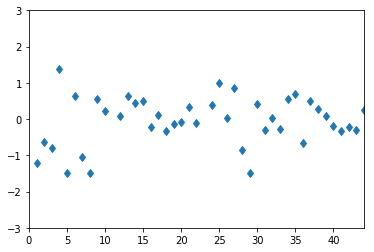

In [10]:
(D.isi - D.g).plot(lw=0, marker='d', ylim=(-3,3));

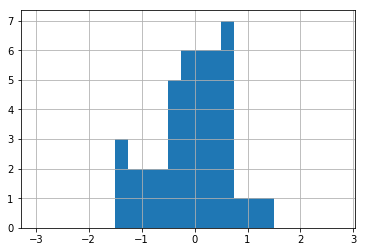

In [11]:
(D.isi - D.g).hist(bins=arange(-3,3,0.25))

Создается впечатление, что вариация МСИ происходила по нормальному закону. Однако, мы не учли, что тут смешаны и длинные и короткие МСИ.

Пересчитаем остатки, нормализовав их по групповому значению.

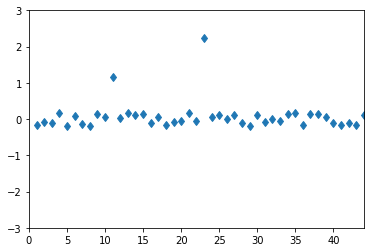

In [12]:
r=((D.isi - D.g)/D.g)
r.plot(lw=0, marker='d', ylim=(-3,3));

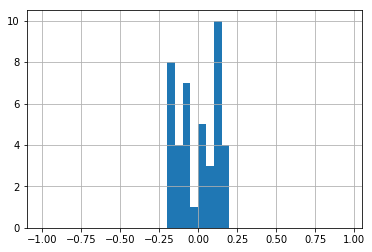

In [13]:
# из-за выбросов приходится задавать жесткие границы классов
r.hist(bins=arange(-1,1,0.05));

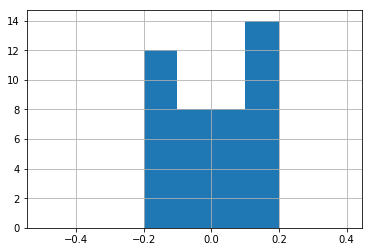

In [14]:
r.hist(bins=arange(-.5,.5,0.1));

Столбцы гистограммы не снижаются к бокам и при этом видны четкие границы (без учета двух выборосов, которые не видны на рисунке) - это признаки равномерного распределения в заданных пределах $\pm 20\%$.